In [1]:
# 📚 Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam

In [3]:
# 🗂 Step 2: Define a Function to Load and Augment Data
def load_data(data_path, img_size=(150, 150), batch_size=32, val_split=0.2):
    """
    Loads training and validation datasets from a given directory using ImageDataGenerator.

    Args:
        data_path (str): The path to the dataset folder.
        img_size (tuple): Size to resize each image.
        batch_size (int): Number of images per batch.
        val_split (float): Portion of data to be used for validation.

    Returns:
        train_generator, val_generator: Data generators for training and validation.
    """

    datagen = ImageDataGenerator(
        rescale=1.0/255,        # Normalize image pixels to range [0, 1]
        shear_range=0.2,        # Apply random shear for augmentation
        zoom_range=0.2,         # Apply random zoom
        horizontal_flip=True,   # Randomly flip images horizontally
        validation_split=val_split  # Split data into training and validation sets
    )

    # Load training data
    train_generator = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    # Load validation data
    val_generator = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, val_generator

In [5]:
# 🧠 Step 3: Define CNN Model Architecture
def build_cnn_model(num_classes, img_shape=(150, 150, 3), dropout=0.5):
    """
    Builds a simple Convolutional Neural Network model.

    Args:
        num_classes (int): Number of output classes.
        img_shape (tuple): Shape of input images.
        dropout (float): Dropout rate to prevent overfitting.

    Returns:
        model: Compiled Keras model.
    """

    model = Sequential()

    # First convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolution layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten output to 1D and add dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))  # Dropout to reduce overfitting
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    return model

In [7]:
# 📊 Step 4: Training and Evaluation Function
def train_and_evaluate(model, train_gen, val_gen, name, lr=0.001, epochs=15):
    """
    Compiles, trains, and evaluates the CNN model.

    Args:
        model: Compiled CNN model.
        train_gen: Training data generator.
        val_gen: Validation data generator.
        name (str): Model name (for plot titles).
        lr (float): Learning rate.
        epochs (int): Number of training epochs.

    Returns:
        history: Training history.
    """

    # Compile the model using Adam optimizer
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_gen, validation_data=val_gen, epochs=epochs)

    # Evaluate the model
    print(f"\nEvaluating {name} model...")
    val_gen.reset()  # Ensure correct batch order
    predictions = model.predict(val_gen)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = val_gen.classes
    class_labels = list(val_gen.class_indices.keys())

    # Print classification report
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    # Plot accuracy over epochs
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{name} - Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return history

In [9]:
def build_nn_model(num_classes, img_shape=(150, 150, 3), dropout=0.5):
    """
    Builds a simple feedforward neural network model for image classification.

    Args:
        num_classes (int): Number of classes.
        img_shape (tuple): Input image shape.
        dropout (float): Dropout rate.

    Returns:
        model: A compiled Keras model.
    """
    model = Sequential()

    model.add(InputLayer(input_shape=img_shape))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [11]:
def load_test_data(test_path, img_size=(150, 150), batch_size=32):
    test_datagen = ImageDataGenerator(rescale=1.0/255)
    
    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False  # Important for correct predictions vs labels
    )
    
    return test_generator


In [29]:
def Show_confusion_matrix(model,test_gen):
    # Evaluate model on test data
    test_loss, test_accuracy = model.evaluate(test_gen)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Predict and show confusion matrix
    test_preds = model.predict(test_gen)
    test_pred_classes = np.argmax(test_preds, axis=1)
    test_true_classes = test_gen.classes
    labels = list(test_gen_2.class_indices.keys())
    
    print("Classification Report on Test Set:")
    print(classification_report(test_true_classes, test_pred_classes, target_names=labels))
    
    # Confusion matrix
    cm = confusion_matrix(test_true_classes, test_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title("Test Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Found 4353 images belonging to 4 classes.
Found 1086 images belonging to 4 classes.


C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 519ms/step - accuracy: 0.4436 - loss: 1.1853 - val_accuracy: 0.5009 - val_loss: 1.0234
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 69s 504ms/step - accuracy: 0.4963 - loss: 1.0144 - val_accuracy: 0.5221 - val_loss: 0.9413
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 69s 502ms/step - accuracy: 0.5439 - loss: 0.9573 - val_accuracy: 0.5534 - val_loss: 0.8976
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 51s 370ms/step - accuracy: 0.5386 - loss: 0.9344 - val_accuracy: 0.5488 - val_loss: 0.8883
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 57s 419ms/step - accuracy: 0.5653 - loss: 0.9102 - val_accuracy: 0.5626 - val_loss: 0.8794
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 420ms/step - accuracy: 0.5649 - loss: 0.8919 - val_accuracy: 0.5479 - val_loss: 0.8871
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 54s 395ms/step - accuracy: 0.5817 - loss: 0.8741 - val_accuracy: 0.5829 - val_loss: 0.8529
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 403ms/step - accuracy: 0.5885 - loss: 0

C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


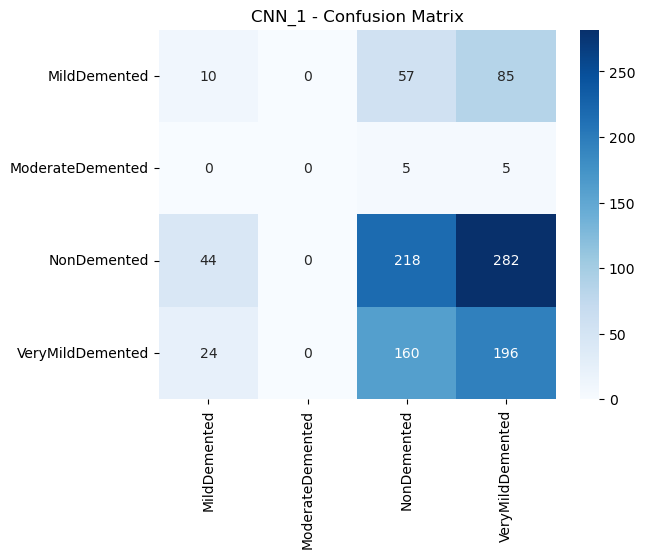

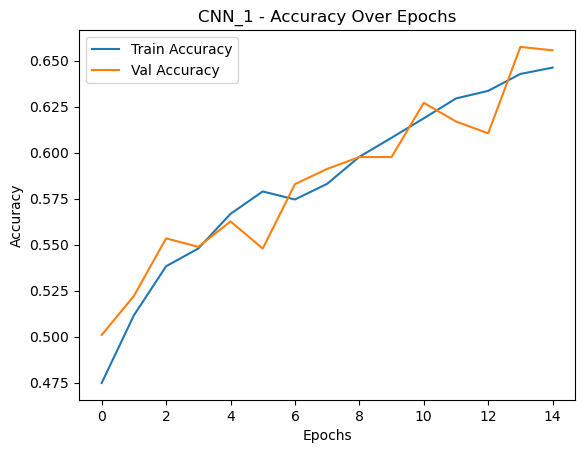

C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 415ms/step - accuracy: 0.3883 - loss: 10.7262 - val_accuracy: 0.5009 - val_loss: 1.0953
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 402ms/step - accuracy: 0.4751 - loss: 1.1585 - val_accuracy: 0.5009 - val_loss: 1.0649
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 402ms/step - accuracy: 0.4952 - loss: 1.0664 - val_accuracy: 0.5009 - val_loss: 1.0412
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 426ms/step - accuracy: 0.4986 - loss: 1.0413 - val_accuracy: 0.5009 - val_loss: 1.0358
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 59s 428ms/step - accuracy: 0.4874 - loss: 1.0789 - val_accuracy: 0.5009 - val_loss: 1.0337
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 422ms/step - accuracy: 0.5092 - loss: 1.0219 - val_accuracy: 0.5009 - val_loss: 1.0331
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 56s 408ms/step - accuracy: 0.4957 - loss: 1.0498 - val_accuracy: 0.5009 - val_loss: 1.0326
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 402ms/step - accuracy: 0.5160 - loss: 

C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gm010\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


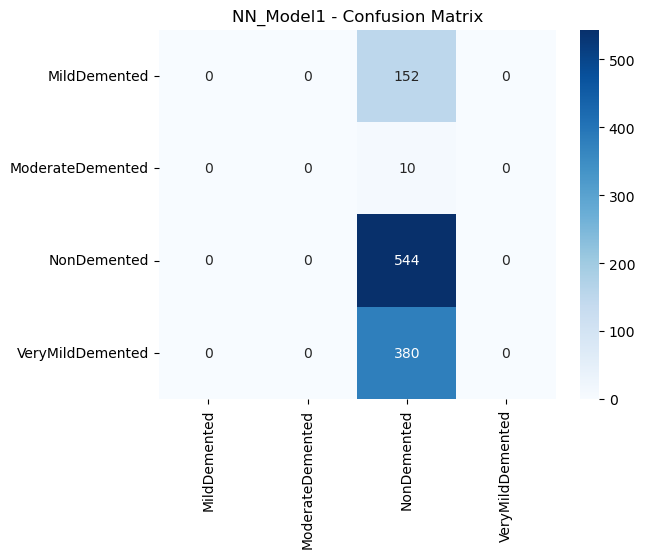

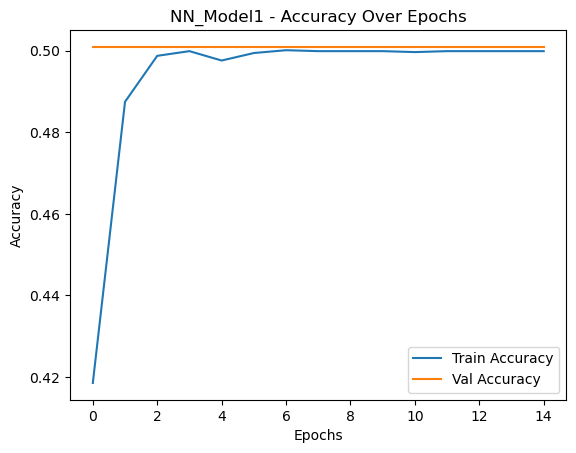

NameError: name 'evaluate_on_test' is not defined

In [13]:
# 🧪 Step 5: Load Data and Train Model on Dataset 1 (4 Classes)
# Path to 4-class Alzheimer dataset
train_path_1 = "C://Users//gm010//NN//Alzheimer_MRI_4_classes_Split_Dataset//train"
# Assuming your test data is in this folder:
test_path_1 = "C://Users//gm010//NN//Alzheimer_MRI_4_classes_Split_Dataset//test"
# Load data
train_1, val_1 = load_data(train_path_1)

# Build CNN model
model_1_cnn = build_cnn_model(num_classes=4)

# Train and evaluate
history_1 = train_and_evaluate(model_1_cnn, train_1, val_1, name="CNN_1")

# 🧠 Build dense NN model
model_nn_1 = build_nn_model(num_classes=4, dropout=0.4)

# 🧪 Train on 4-class Alzheimer data
history_nn_1 = train_and_evaluate(model_nn_1, train_1, val_1, name="NN_Model1")

# Load test data
test_gen_1 = load_test_data(test_path_1)

Show_confusion_matrix(model_1_cnn,test_gen_1)
Show_confusion_matrix(model_nn_1,test_gen_1)


Found 26614 images belonging to 3 classes.
Found 6652 images belonging to 3 classes.
Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 338s 405ms/step - accuracy: 0.5483 - loss: 1.0024 - val_accuracy: 0.7423 - val_loss: 0.5442
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 348s 418ms/step - accuracy: 0.6856 - loss: 0.6414 - val_accuracy: 0.7971 - val_loss: 0.4514
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 413s 496ms/step - accuracy: 0.7320 - loss: 0.5527 - val_accuracy: 0.8155 - val_loss: 0.4019
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 454s 546ms/step - accuracy: 0.7538 - loss: 0.5166 - val_accuracy: 0.8382 - val_loss: 0.3600
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 424s 509ms/step - accuracy: 0.7805 - loss: 0.4644 - val_accuracy: 0.8413 - val_loss: 0.3512
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 386s 464ms/step - accuracy: 0.7911 - loss: 0.4467 - val_accuracy: 0.8510 - val_loss: 0.3244
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 387s 465ms/step - accuracy: 0.8039 - loss: 0.4288 - val_accuracy: 0.8531 - val_loss

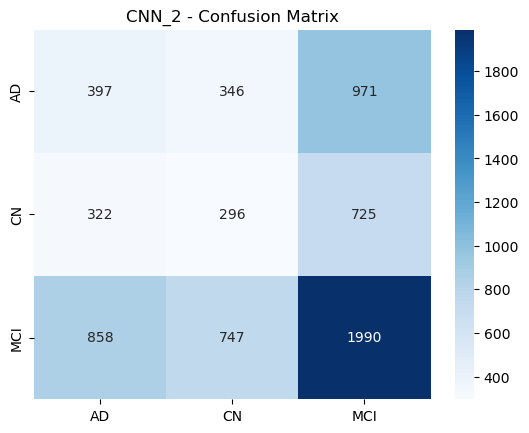

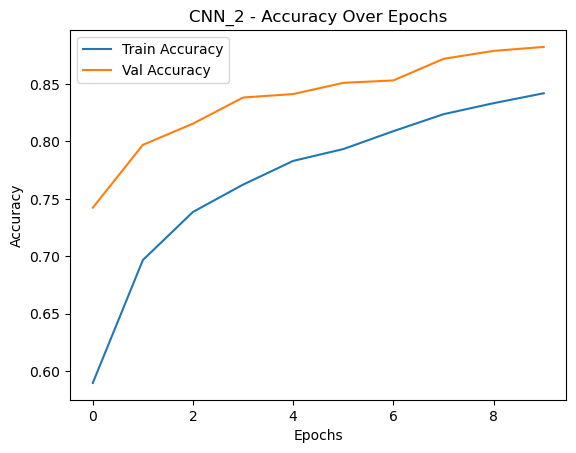

C:\Users\gm010\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 384s 459ms/step - accuracy: 0.5010 - loss: 3.2392 - val_accuracy: 0.5404 - val_loss: 1.0054
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 376s 452ms/step - accuracy: 0.5380 - loss: 1.0072 - val_accuracy: 0.5404 - val_loss: 1.0082
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 391s 469ms/step - accuracy: 0.5387 - loss: 1.0079 - val_accuracy: 0.5404 - val_loss: 1.0051
Epoch 4/10
531/832 ━━━━━━━━━━━━━━━━━━━━ 2:01 405ms/step - accuracy: 0.5361 - loss: 1.0110

KeyboardInterrupt: 

In [17]:
# 🧪 Step 6: Load Data and Train Model on Dataset 2 (3 Classes)
# Path to 3-class Alzheimer dataset
train_path_2 = "C://Users//gm010//NN//Alzheimer_Split_3_classes_dataset//train"
# Assuming your test data is in this folder:
test_path_2 = "C://Users//gm010//NN//Alzheimer_Split_3_classes_dataset//test"
# Load data
train_2, val_2 = load_data(train_path_2)

# Build CNN model with slightly less dropout
model_2_cnn = build_cnn_model(num_classes=3, dropout=0.3)

# Train and evaluate
history_2 = train_and_evaluate(model_2_cnn, train_2, val_2, name="CNN_2",epochs=10)
# 🧠 Build dense NN model
model_nn_2 = build_nn_model(num_classes=3, dropout=0.4)

# 🧪 Train on 3-class Alzheimer data
history_nn_2 = train_and_evaluate(model_nn_2, train_2, val_2, name="NN_Model_2",epochs=10)

# Load test data
test_gen_2 = load_test_data(test_path_2)
Show_confusion_matrix(model_nn_2,test_gen_2)
Show_confusion_matrix(model_nn_2,test_gen_2)

In [ ]:
# 🧪 Step 6: Load Data and Train Model on Dataset 2 (3 Classes)
# Path to 3-class Alzheimer dataset
train_path_3 = "C://Users//gm010//NN//Alzheimer_s Dataset//train"
# Assuming your test data is in this folder:
test_path_3 = "C://Users//gm010//NN//Alzheimer_s Dataset//test"
# Load data
train_3, val_3 = load_data(train_path_3)

# Build CNN model with slightly less dropout
model_3_cnn = build_cnn_model(num_classes=4, dropout=0.3)

# Train and evaluate
history_3 = train_and_evaluate(model_3_cnn, train_3, val_3, name="CNN_3",lr=0.0001,epochs=10)
# 🧠 Build dense NN model
model_nn_3 = build_nn_model(num_classes=4, dropout=0.4)

# 🧪 Train on 4-class Alzheimer data
history_nn_3 = train_and_evaluate(model_nn_3, train_3, val_3, name="NN_Model_3",lr=0.0001,epochs=10)

# Load test data
test_gen_3 = load_test_data(test_path_3)
Show_confusion_matrix(model_nn_3,test_gen_3)
Show_confusion_matrix(model_nn_3,test_gen_3)